## Code Preface

In [34]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

## Load and merge dataset

In [28]:
df1 = pd.read_csv('final_project.csv')
df2 = pd.read_csv('temp1.csv')
temp = df1.merge(df2,left_on='tic',right_on='TICKER',how='inner')
temp.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,costat,ggroup,gsector,naics,sic,TICKER,ReturnEarly2020,ReturnLate2020
0,1004,20200531,2019,INDL,C,D,STD,AIR,USD,A,2010,20,423860,5080,AIR,-0.603849172,1.039410
1,1045,20201231,2020,INDL,C,D,STD,AAL,USD,A,2030,20,481111,4512,AAL,-0.572734092,0.293682
2,1050,20201231,2020,INDL,C,D,STD,CECE,USD,A,2020,20,333413,3564,CECE,-0.390339285,0.490365
3,1075,20201231,2020,INDL,C,D,STD,PNW,USD,A,5510,55,2211,4911,PNW,-0.150482745,0.086464
4,1078,20201231,2020,INDL,C,D,STD,ABT,USD,A,3510,35,334510,3845,ABT,-0.087773459,0.402724


In [29]:
# Check whether dataset has missing value
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gvkey            2671 non-null   int64  
 1   datadate         2671 non-null   int64  
 2   fyear            2671 non-null   int64  
 3   indfmt           2671 non-null   object 
 4   consol           2671 non-null   object 
 5   popsrc           2671 non-null   object 
 6   datafmt          2671 non-null   object 
 7   tic              2671 non-null   object 
 8   curcd            2671 non-null   object 
 9   costat           2671 non-null   object 
 10  ggroup           2671 non-null   int64  
 11  gsector          2671 non-null   int64  
 12  naics            2671 non-null   int64  
 13  sic              2671 non-null   int64  
 14  TICKER           2671 non-null   object 
 15  ReturnEarly2020  2671 non-null   object 
 16  ReturnLate2020   2671 non-null   float64
dtypes: float64(1),

In [30]:
# Delete #VALUE! in ReturnEarly2020
df_copy = temp.loc[temp["ReturnEarly2020"] != "#VALUE!"]
# ReturnEarly2020 is object, convert it into numeric type
df_copy["ReturnEarly2020"] = pd.to_numeric(df_copy["ReturnEarly2020"])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gvkey            2666 non-null   int64  
 1   datadate         2666 non-null   int64  
 2   fyear            2666 non-null   int64  
 3   indfmt           2666 non-null   object 
 4   consol           2666 non-null   object 
 5   popsrc           2666 non-null   object 
 6   datafmt          2666 non-null   object 
 7   tic              2666 non-null   object 
 8   curcd            2666 non-null   object 
 9   costat           2666 non-null   object 
 10  ggroup           2666 non-null   int64  
 11  gsector          2666 non-null   int64  
 12  naics            2666 non-null   int64  
 13  sic              2666 non-null   int64  
 14  TICKER           2666 non-null   object 
 15  ReturnEarly2020  2666 non-null   float64
 16  ReturnLate2020   2666 non-null   float64
dtypes: float64(2),

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
# Clean the data
df = df_copy.drop(columns=['TICKER', 'gvkey','datadate','fyear','indfmt','consol','popsrc','datafmt','curcd','costat'])
df.head()

,tic,ggroup,gsector,naics,sic,ReturnEarly2020,ReturnLate2020
0,AIR,2010,20,423860,5080,-0.603849,1.039410
1,AAL,2030,20,481111,4512,-0.572734,0.293682
2,CECE,2020,20,333413,3564,-0.390339,0.490365
3,PNW,5510,55,2211,4911,-0.150483,0.086464
4,ABT,3510,35,334510,3845,-0.087773,0.402724


# **GGROUP Industry Analysis**

### Create Industry Indicator (category) variables for the 24 Industry categories based on GICS GGROUP


In [32]:
df_ggroup = df[['tic','ggroup','ReturnEarly2020','ReturnLate2020']]
# Get dummies of ggroup
df_ggroup = pd.get_dummies(df_ggroup, columns=['ggroup'])
df_ggroup.head()

,tic,ReturnEarly2020,ReturnLate2020,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,ggroup_2550,ggroup_3010,ggroup_3020,ggroup_3030,ggroup_3510,ggroup_3520,ggroup_4010,ggroup_4020,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010
0,AIR,-0.603849,1.039410,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AAL,-0.572734,0.293682,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CECE,-0.390339,0.490365,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,PNW,-0.150483,0.086464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ABT,-0.087773,0.402724,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Calculate average stock returns for each industry classification (24 industry groups)

In [7]:
# Create a list of  
groups = (df_ggroup.loc[:,df_ggroup.columns.str.contains('ggroup')]).columns.to_list()

# Calculate average stock return of each group
avg_late_return1 = []
avg_early_return1 = []
group = [0]*len(groups)
for i in range(len(groups)):
  group[i] = df_ggroup[df_ggroup[groups[i]] == 1]
  avg_late = sum(group[i]['ReturnLate2020'])/group[i].shape[0]
  avg_early = sum(group[i]['ReturnEarly2020'])/group[i].shape[0]
  avg_late_return1.append(avg_late)
  avg_early_return1.append(avg_early)

In [33]:
# Put all results into dataframe
avg_return_ggroup = pd.DataFrame(
    {'ggroup': groups,
     'avg_late_return': avg_late_return1,
     'avg_early_return': avg_early_return1
    })
avg_return_ggroup

,ggroup,avg_late_return,avg_early_return
0,ggroup_1010,1.017517,-0.580745
1,ggroup_1510,0.873224,-0.350917
2,ggroup_2010,0.897509,-0.316851
3,ggroup_2020,0.605461,-0.332514
4,ggroup_2030,0.709745,-0.326556
5,ggroup_2510,1.811358,-0.429483
6,ggroup_2520,1.594357,-0.391515
7,ggroup_2530,1.131115,-0.448220
8,ggroup_2550,1.780307,-0.385352
9,ggroup_3010,0.404087,-0.175851


We can see that all of the stock returns among 24 industries in early 2020 are negative values. This is because that people didn't realize what would be going on and how terrible the covid-19 is, such as stay-at-home orders and
quarantine requirements. So all the industries have suffered a lot, and the stock return dropped sharply, average value of return in the different groups are negative.

Also it worth noting that all of the average stock returns are positive values. This is because global economy was reviving during the late 2020.

### The highest stock return for early 2020

[Text(0, 0, 'ggroup_1010'),
 Text(0, 0, 'ggroup_1510'),
 Text(0, 0, 'ggroup_2010'),
 Text(0, 0, 'ggroup_2020'),
 Text(0, 0, 'ggroup_2030'),
 Text(0, 0, 'ggroup_2510'),
 Text(0, 0, 'ggroup_2520'),
 Text(0, 0, 'ggroup_2530'),
 Text(0, 0, 'ggroup_2550'),
 Text(0, 0, 'ggroup_3010'),
 Text(0, 0, 'ggroup_3020'),
 Text(0, 0, 'ggroup_3030'),
 Text(0, 0, 'ggroup_3510'),
 Text(0, 0, 'ggroup_3520'),
 Text(0, 0, 'ggroup_4010'),
 Text(0, 0, 'ggroup_4020'),
 Text(0, 0, 'ggroup_4030'),
 Text(0, 0, 'ggroup_4510'),
 Text(0, 0, 'ggroup_4520'),
 Text(0, 0, 'ggroup_4530'),
 Text(0, 0, 'ggroup_5010'),
 Text(0, 0, 'ggroup_5020'),
 Text(0, 0, 'ggroup_5510'),
 Text(0, 0, 'ggroup_6010')]

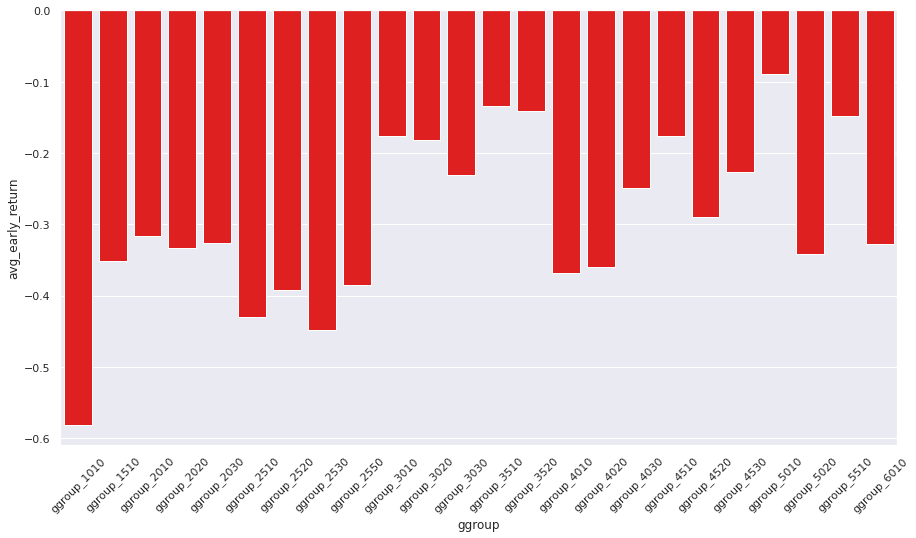

In [45]:
sns.set(rc = {'figure.figsize':(15,8)})
chart1 = sns.barplot(x='ggroup',y='avg_early_return',data=avg_return_ggroup,color='red')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

[Text(0, 0, 'ggroup_1010'),
 Text(0, 0, 'ggroup_1510'),
 Text(0, 0, 'ggroup_2010'),
 Text(0, 0, 'ggroup_2020'),
 Text(0, 0, 'ggroup_2030'),
 Text(0, 0, 'ggroup_2510'),
 Text(0, 0, 'ggroup_2520'),
 Text(0, 0, 'ggroup_2530'),
 Text(0, 0, 'ggroup_2550'),
 Text(0, 0, 'ggroup_3010'),
 Text(0, 0, 'ggroup_3020'),
 Text(0, 0, 'ggroup_3030'),
 Text(0, 0, 'ggroup_3510'),
 Text(0, 0, 'ggroup_3520'),
 Text(0, 0, 'ggroup_4010'),
 Text(0, 0, 'ggroup_4020'),
 Text(0, 0, 'ggroup_4030'),
 Text(0, 0, 'ggroup_4510'),
 Text(0, 0, 'ggroup_4520'),
 Text(0, 0, 'ggroup_4530'),
 Text(0, 0, 'ggroup_5010'),
 Text(0, 0, 'ggroup_5020'),
 Text(0, 0, 'ggroup_5510'),
 Text(0, 0, 'ggroup_6010')]

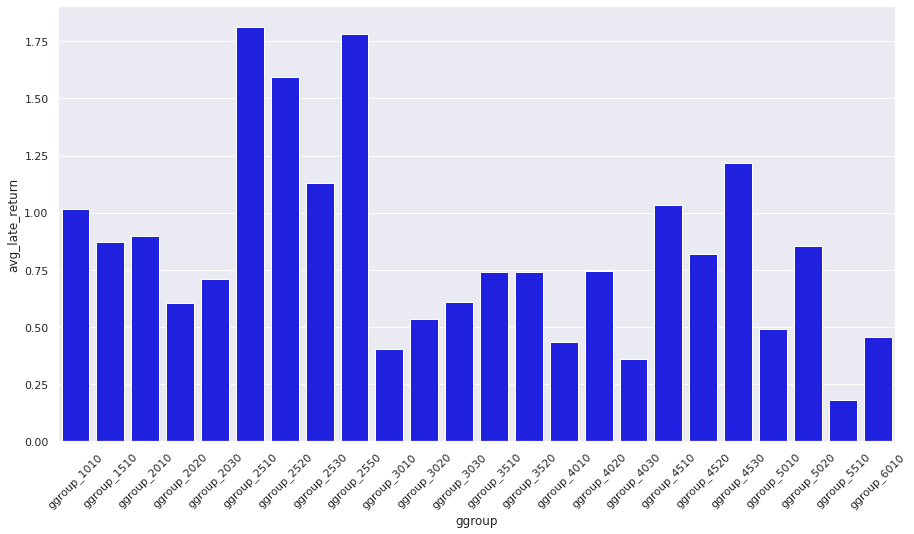

In [54]:
sns.set(rc = {'figure.figsize':(15,8)})
chart1 = sns.barplot(x='ggroup',y='avg_late_return',data=avg_return_ggroup,color='blue')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

In [9]:
return_high = avg_return_ggroup[avg_return_ggroup.avg_early_return == avg_return_ggroup.avg_early_return.max()]
return_high.drop(columns='avg_late_return',inplace=True)
return_high

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ggroup,avg_early_return
20,ggroup_5010,-0.089193


The industry that has the highest stock return in early 2020 is ggroup_5010, which is telecommunication services industry. The average stock return is -0.089193. In sharp contrast to many other industries, the telecommunication services has been generally exempted from major COVID-19-related restrictions, as it is recognized as an essential service. Since more people are working from home and rely on video conferencing to hold meetings. In this way, traffic would grow in and reliance on connectivity and digital had been increased. Also, with the publishment of 5G, the growth and innovation of telecommunication industry are unstoppable.
As a result, the telecom sector has remained acyclical relative to other industries throughout the crisis

### The lowest stock return for early 2020

In [10]:
return_low = avg_return_ggroup[avg_return_ggroup.avg_early_return == avg_return_ggroup.avg_early_return.min()]
return_low.drop(columns='avg_late_return',inplace=True)
return_low

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ggroup,avg_early_return
0,ggroup_1010,-0.580745


The industry that has the lowest stock return in early2020 is ggroup_1010 which is oil, gas & consumable fules industry. The average stock return is -0.580745. The impact of COVID-19 on oil gas, and comsumable industry is huge. Oil prices are dropping due to failed agreements on production cuts and the need for chemicals and refined products is slowing from industrial slow-downs and travel restrictions during the global pandemic. Also there was a oil price war between Russia and Saudi Arabia, which have a severe impact on stock market of the United States. So this lowest stock return during early 2020 in oil, gas and consumable fules industry is reasonable.

### The highest stock return for late 2020

In [11]:
return_high = avg_return_ggroup[avg_return_ggroup.avg_late_return == avg_return_ggroup.avg_late_return.max()]
return_high.drop(columns='avg_early_return',inplace=True)
return_high

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ggroup,avg_late_return
5,ggroup_2510,1.811358


The industry that has the highest stock return in late 2020 is ggroup_2510 which is automobiles & components industry. The average stock return is 1.811358. During the late 2020, we still have covid-19 related restrictions. We are required to wear masks and keep social distancing all the time, so traveling would be a trouble especially on public trasportation. With that being said, the needs for automobiles increased drastically. Similarly, the needs for automobile related components increased since these two are complementary goods.

### The lowest stock return for late 2020

In [12]:
return_low = avg_return_ggroup[avg_return_ggroup.avg_late_return == avg_return_ggroup.avg_late_return.min()]
return_low.drop(columns='avg_early_return',inplace=True)
return_low

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ggroup,avg_late_return
22,ggroup_5510,0.181212


The industry that has the lowest stock return in late 2020 is ggroup_5510 which represents the electricity, gas and water utilities. The average stock return is 0.181212. Because electricity, gas and water are the daily requirements of people, so the reviving of the economy would not have huge infuluence on the 5510 group industry's stock return. 

### Run fixed effect regressions (using industry fixed effects) to explain both ReturnEarly2020

### Early2020

In [13]:
# define x as a subset of original dataframe
x = df_ggroup.loc[:,df_ggroup.columns.str.contains('ggroup')]
# define y as a series of ReturnEarly2020
y = df_ggroup['ReturnEarly2020']

# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ReturnEarly2020   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     17.25
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.47e-64
Time:                        23:28:55   Log-Likelihood:                -500.81
No. Observations:                2666   AIC:                             1050.
Df Residuals:                    2642   BIC:                             1191.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ggroup_1010    -0.5807      0.029    -20.193      0.000      -0.637      -0.524
ggroup_1510    -0.3509      0.027    -13.161      0.000      -0.403      -0.299
ggroup_2010    -0.3169      0.019    -16.490      0.000      -0.355      -0.279
ggroup_2020    -0.3325      0.032    -10.329      0.000      -0.396      -0.269
ggroup_2030    -0.3266      0.041     -8.029      0.000      -0.406      -0.247
ggroup_2510    -0.4295      0.054     -7.886      0.000      -0.536      -0.323
ggroup_2520    -0.3915      0.032    -12.088      0.000      -0.455      -0.328
ggroup_2530    -0.4482      0.031    -14.417      0.000      -0.509      -0.387
ggroup_2550    -0.3854      0.029    -13.269      0.000      -0.442      -0.328
ggroup_3010    -0.1759      0.063     -2.812      0.005      -0.298      -0.053
ggroup_3020    -0.1810      0.038     -4.780      0.000      -0.255      -0.107
ggroup_3030    -0.2310      0.060     -3.859      0.000      -0.348      -0.114
ggroup_3510    -0.1343      0.022     -6.022      0.000      -0.178      -0.091
ggroup_3520    -0.1410      0.017     -8.425      0.000      -0.174      -0.108
ggroup_4010    -0.3685      0.017    -21.615      0.000      -0.402      -0.335
ggroup_4020    -0.3596      0.026    -13.651      0.000      -0.411      -0.308
ggroup_4030    -0.2495      0.032     -7.796      0.000      -0.312      -0.187
ggroup_4510    -0.1765      0.022     -8.209      0.000      -0.219      -0.134
ggroup_4520    -0.2896      0.030     -9.520      0.000      -0.349      -0.230
ggroup_4530    -0.2265      0.037     -6.081      0.000      -0.300      -0.153
ggroup_5010    -0.0892      0.066     -1.360      0.174      -0.218       0.039
ggroup_5020    -0.3414      0.034    -10.080      0.000      -0.408      -0.275
ggroup_5510    -0.1479      0.035     -4.189      0.000      -0.217      -0.079
ggroup_6010    -0.3281      0.022    -14.842      0.000      -0.371      -0.285
==============================================================================
Omnibus:                     4274.602   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4937369.788
Skew:                           9.951   Prob(JB):                         0.00
Kurtosis:                     212.884   Cond. No.                         3.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the output above we can see that all industry is statistically significant except for ggoup_5010, which is the telecommunication services industry. It can be interpreted that pademic have severe negative influence on almost all the industries but slightly or no influence on telecommunication services.
The coefficients of each industry indicate the average return in early 2020 of these industries. For example, the coefficient of ggroup_1010 is -0.5807, which means that average stock return of ggorup_1010 is -0.5807 in early 2020.

### Late2020

In [87]:
# define x as a subset of original dataframe
x = df_ggroup.loc[:,df_ggroup.columns.str.contains('ggroup')]
# define y as a series of ReturnEarly2020
y = df_ggroup['ReturnLate2020']

# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ReturnLate2020   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     14.18
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           7.91e-52
Time:                        01:51:38   Log-Likelihood:                -3817.5
No. Observations:                2666   AIC:                             7683.
Df Residuals:                    2642   BIC:                             7824.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ggroup_1010     1.0175      0.100     10.197      0.000       0.822       1.213
ggroup_1510     0.8732      0.093      9.439      0.000       0.692       1.055
ggroup_2010     0.8975      0.067     13.462      0.000       0.767       1.028
ggroup_2020     0.6055      0.112      5.420      0.000       0.386       0.824
ggroup_2030     0.7097      0.141      5.029      0.000       0.433       0.986
ggroup_2510     1.8114      0.189      9.585      0.000       1.441       2.182
ggroup_2520     1.5944      0.112     14.187      0.000       1.374       1.815
ggroup_2530     1.1311      0.108     10.486      0.000       0.920       1.343
ggroup_2550     1.7803      0.101     17.668      0.000       1.583       1.978
ggroup_3010     0.4041      0.217      1.862      0.063      -0.021       0.830
ggroup_3020     0.5335      0.131      4.061      0.000       0.276       0.791
ggroup_3030     0.6115      0.208      2.944      0.003       0.204       1.019
ggroup_3510     0.7397      0.077      9.561      0.000       0.588       0.891
ggroup_3520     0.7397      0.058     12.737      0.000       0.626       0.854
ggroup_4010     0.4338      0.059      7.334      0.000       0.318       0.550
ggroup_4020     0.7456      0.091      8.158      0.000       0.566       0.925
ggroup_4030     0.3584      0.111      3.228      0.001       0.141       0.576
ggroup_4510     1.0355      0.075     13.877      0.000       0.889       1.182
ggroup_4520     0.8171      0.106      7.743      0.000       0.610       1.024
ggroup_4530     1.2186      0.129      9.428      0.000       0.965       1.472
ggroup_5010     0.4901      0.228      2.154      0.031       0.044       0.936
ggroup_5020     0.8547      0.118      7.274      0.000       0.624       1.085
ggroup_5510     0.1812      0.123      1.479      0.139      -0.059       0.421
ggroup_6010     0.4567      0.077      5.953      0.000       0.306       0.607
==============================================================================
Omnibus:                     2896.217   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           349665.002
Skew:                           5.264   Prob(JB):                         0.00
Kurtosis:                      58.109   Cond. No.                         3.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the output above we can see that all industry is statistically significant except for ggoup_3010 and ggroup_5510, which are the food & staple retailing and the telecommunication services industries. It can be interpreted that economic reviving of later pandemic have positive influence on almost all the industries but slightly or no influence on food & staple and telecommunication services.
The coefficients of each industry indicate the average return in late 2020 of these industries. For example, the coefficient of ggroup_1010 is 1.0175, which means that average stock return of ggorup_1010 is 1.0175 in late 2020.

The adjusted R square of regression on RenturnEarly2020 is 0.123, and the adjusted R square of regression on ReturnLate2020 is 0.101. In this way, the epxlanatory power of regression on ReturnEarly2020 is higher than that on ResturnLate2020.

### Combine the industry fixed effects with financial ratios

In [9]:
assign3 = pd.read_csv('assign3.csv')
assign3.drop(columns=['ReturnEarly2020','ReturnLate2020','Unnamed: 0'],inplace=True)
df_ggroup_ratios = df_ggroup.merge(assign3,how='inner',left_on='tic',right_on='TICKER')
df_ggroup_ratios.drop(columns=['tic','TICKER'],inplace=True)
df_ggroup_ratios.head()

,ReturnEarly2020,ReturnLate2020,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,ggroup_2550,ggroup_3010,ggroup_3020,ggroup_3030,ggroup_3510,ggroup_3520,ggroup_4010,ggroup_4020,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010,Price/Book,P/E,P/EBIT,P/SALES
0,-0.603849,1.039410,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.753683,359.744250,14.602165,0.757610
1,-0.572734,0.293682,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-31.367242,7.284023,3.313778,0.268329
2,-0.390339,0.490365,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.394434,15.200171,13.716717,0.787288
3,-0.150483,0.086464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.861908,18.783195,15.047576,2.912924
4,-0.087773,0.402724,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.924441,41.521836,30.369175,4.798490


### Early2020

In [15]:
# define x as a subset of original dataframe
x = df_ggroup_ratios.loc[:,~df_ggroup_ratios.columns.str.contains('Return')]
# define y as a series
y = df_ggroup_ratios['ReturnEarly2020']
# Add a constant
x = sm.add_constant(x)
# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ReturnEarly2020   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     15.65
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.34e-66
Time:                        23:32:03   Log-Likelihood:                -474.74
No. Observations:                2599   AIC:                             1005.
Df Residuals:                    2571   BIC:                             1170.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2892      0.008    -37.727      0.000      -0.304      -0.274
ggroup_1010    -0.2972      0.029    -10.405      0.000      -0.353      -0.241
ggroup_1510    -0.0678      0.026     -2.570      0.010      -0.119      -0.016
ggroup_2010    -0.0358      0.020     -1.828      0.068      -0.074       0.003
ggroup_2020    -0.0547      0.032     -1.733      0.083      -0.117       0.007
ggroup_2030    -0.0434      0.040     -1.099      0.272      -0.121       0.034
ggroup_2510    -0.1491      0.053     -2.839      0.005      -0.252      -0.046
ggroup_2520    -0.1126      0.031     -3.586      0.000      -0.174      -0.051
ggroup_2530    -0.1747      0.030     -5.747      0.000      -0.234      -0.115
ggroup_2550    -0.1081      0.028     -3.807      0.000      -0.164      -0.052
ggroup_3010     0.1047      0.060      1.739      0.082      -0.013       0.223
ggroup_3020     0.0960      0.035      2.722      0.007       0.027       0.165
ggroup_3030     0.0338      0.058      0.586      0.558      -0.079       0.147
ggroup_3510     0.1367      0.023      6.012      0.000       0.092       0.181
ggroup_3520     0.1639      0.021      7.825      0.000       0.123       0.205
ggroup_4010    -0.0840      0.018     -4.704      0.000      -0.119      -0.049
ggroup_4020    -0.0789      0.026     -3.004      0.003      -0.130      -0.027
ggroup_4030     0.0348      0.031      1.108      0.268      -0.027       0.096
ggroup_4510     0.0917      0.022      4.130      0.000       0.048       0.135
ggroup_4520    -0.0081      0.030     -0.271      0.786      -0.067       0.051
ggroup_4530     0.0470      0.036      1.294      0.196      -0.024       0.118
ggroup_5010     0.1910      0.063      3.026      0.002       0.067       0.315
ggroup_5020    -0.0597      0.033     -1.798      0.072      -0.125       0.005
ggroup_5510     0.1361      0.034      4.002      0.000       0.069       0.203
ggroup_6010    -0.0509      0.022     -2.272      0.023      -0.095      -0.007
Price/Book      0.0019      0.001      2.937      0.003       0.001       0.003
P/E             0.0001   7.25e-05      1.609      0.108   -2.55e-05       0.000
P/EBIT       4.671e-05      0.000      0.464      0.643      -0.000       0.000
P/SALES       4.87e-05      0.000      0.439      0.660      -0.000       0.000
==============================================================================
Omnibus:                     4237.956   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5243535.536
Skew:                          10.283   Prob(JB):                         0.00
Kurtosis:                     222.083   Cond. No.                     2.44e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the co

After combining four industry ratios, the adjusted R square increased slightly, from 0.123 to 0.132. So explanatory power of regression on ReturnEarly2020 only increased 0.09. 

Apart from that, It worth noting that, only price/book ratio is statistically significant, the p-value of which is 0.003. The stock return in early 2020 would increase 0.0019 when price/book ratio increase by 1.

### Late2020

In [16]:
# define x as a subset of original dataframe
x = df_ggroup_ratios.loc[:,~df_ggroup_ratios.columns.str.contains('Return')]
# define y as a series
y = df_ggroup_ratios['ReturnLate2020']
# Add a constant
x = sm.add_constant(x)
# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ReturnLate2020   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     13.34
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.25e-55
Time:                        23:32:58   Log-Likelihood:                -3703.4
No. Observations:                2599   AIC:                             7463.
Df Residuals:                    2571   BIC:                             7627.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8221      0.027     30.960      0.000       0.770       0.874
ggroup_1010     0.2016      0.099      2.038      0.042       0.008       0.396
ggroup_1510     0.0714      0.091      0.782      0.434      -0.108       0.250
ggroup_2010     0.1040      0.068      1.535      0.125      -0.029       0.237
ggroup_2020    -0.1818      0.109     -1.662      0.097      -0.396       0.033
ggroup_2030    -0.0973      0.137     -0.711      0.477      -0.366       0.171
ggroup_2510     1.0135      0.182      5.571      0.000       0.657       1.370
ggroup_2520     0.7912      0.109      7.277      0.000       0.578       1.004
ggroup_2530     0.3368      0.105      3.198      0.001       0.130       0.543
ggroup_2550     0.9835      0.098      9.999      0.000       0.791       1.176
ggroup_3010    -0.3659      0.208     -1.755      0.079      -0.775       0.043
ggroup_3020    -0.3011      0.122     -2.465      0.014      -0.541      -0.062
ggroup_3030    -0.1615      0.200     -0.807      0.420      -0.554       0.231
ggroup_3510    -0.0507      0.079     -0.644      0.520      -0.205       0.104
ggroup_3520    -0.0877      0.073     -1.209      0.227      -0.230       0.055
ggroup_4010    -0.3704      0.062     -5.993      0.000      -0.492      -0.249
ggroup_4020    -0.0497      0.091     -0.547      0.584      -0.228       0.129
ggroup_4030    -0.4377      0.109     -4.021      0.000      -0.651      -0.224
ggroup_4510     0.2276      0.077      2.962      0.003       0.077       0.378
ggroup_4520     0.0021      0.104      0.020      0.984      -0.201       0.205
ggroup_4530     0.4260      0.126      3.384      0.001       0.179       0.673
ggroup_5010    -0.3076      0.219     -1.407      0.159      -0.736       0.121
ggroup_5020    -0.0156      0.115     -0.136      0.892      -0.241       0.210
ggroup_5510    -0.6023      0.118     -5.113      0.000      -0.833      -0.371
ggroup_6010    -0.3063      0.078     -3.945      0.000      -0.458      -0.154
Price/Book     -0.0004      0.002     -0.202      0.840      -0.005       0.004
P/E            -0.0007      0.000     -2.903      0.004      -0.001      -0.000
P/EBIT         -0.0013      0.000     -3.630      0.000      -0.002      -0.001
P/SALES         0.0008      0.000      1.980      0.048    7.43e-06       0.002
==============================================================================
Omnibus:                     2869.297   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           368723.638
Skew:                           5.390   Prob(JB):                         0.00
Kurtosis:                      60.347   Cond. No.                     2.44e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the co

After combining four industry ratios, the adjusted R square increased from 0.101 to 0.113. So the explanatory power of regression on ReturnLate2020 increased slightly. 

Apart from that, p-value of price/book is 0.84, which is not statistically significant.

The p-value of P/E ratio is 0.004, which is statistically significant, if stock return in late 2020 decreased by 0.0007, P/E ratio would incread by 1. 

P-value of P/EBIT is 0.000, which is statistically significant, if stock return in late 2020 decreased by 0.0013, P/EBIT ratio would incread by 1. 

P-value of P/SALES is 0.048, which is statistically significant, if stock return in late 2020 increased by 0.0008, P/SALES ratio would incread by 1. 

# **GSECTOR analysist**

### Create Industry Indicator (category) variables for the 11 setors categories

In [46]:
df_gsector = df[['tic','gsector','ReturnEarly2020','ReturnLate2020']]
# Get dummies of gsector
df_gsector = pd.get_dummies(df_gsector, columns=['gsector'])
df_gsector.head()

,tic,ReturnEarly2020,ReturnLate2020,gsector_10,gsector_15,gsector_20,gsector_25,gsector_30,gsector_35,gsector_40,gsector_45,gsector_50,gsector_55,gsector_60
0,AIR,-0.603849,1.039410,0,0,1,0,0,0,0,0,0,0,0
1,AAL,-0.572734,0.293682,0,0,1,0,0,0,0,0,0,0,0
2,CECE,-0.390339,0.490365,0,0,1,0,0,0,0,0,0,0,0
3,PNW,-0.150483,0.086464,0,0,0,0,0,0,0,0,0,1,0
4,ABT,-0.087773,0.402724,0,0,0,0,0,1,0,0,0,0,0


### Calculate average stock returns for each sector classification

In [47]:
# Create a list of  
sectors = (df_gsector.loc[:,df_gsector.columns.str.contains('gsector')]).columns.to_list()

# Calculate average stock return of each group
avg_late_return2 = []
avg_early_return2 = []
sector = [0]*len(sectors)
for i in range(len(sectors)):
  sector[i] = df_gsector[df_gsector[sectors[i]] == 1]
  avg_late = sum(sector[i]['ReturnLate2020'])/sector[i].shape[0]
  avg_early = sum(sector[i]['ReturnEarly2020'])/sector[i].shape[0]
  avg_late_return2.append(avg_late)
  avg_early_return2.append(avg_early)

In [51]:
# Put all results into dataframe
avg_return_gsector = pd.DataFrame(
    {'gsector': sectors,
     'avg_late_return': avg_late_return2,
     'avg_early_return': avg_early_return2
    })
avg_return_gsector

,gsector,avg_late_return,avg_early_return
0,gsector_10,1.017517,-0.580745
1,gsector_15,0.873224,-0.350917
2,gsector_20,0.805108,-0.321755
3,gsector_25,1.541481,-0.409790
4,gsector_30,0.524287,-0.191263
5,gsector_35,0.739742,-0.138597
6,gsector_40,0.497959,-0.346446
7,gsector_45,1.009217,-0.216448
8,gsector_50,0.777949,-0.288301
9,gsector_55,0.181212,-0.147903


We can see that all of the stock returns among 11 sectors in early 2020 are negative values. This is because that people didn't realize what would be going on and how terrible the covid-19 is, such as stay-at-home orders and
quarantine requirements. So all the industries have suffered a lot, and the stock return dropped sharply, average value of return in the different sectors are negative.

Also it worth noting that all of the average stock returns are positive values. This is because global economy was reviving during the late 2020.

### The highest stock return for early 2020

[Text(0, 0, 'gsector_10'),
 Text(0, 0, 'gsector_15'),
 Text(0, 0, 'gsector_20'),
 Text(0, 0, 'gsector_25'),
 Text(0, 0, 'gsector_30'),
 Text(0, 0, 'gsector_35'),
 Text(0, 0, 'gsector_40'),
 Text(0, 0, 'gsector_45'),
 Text(0, 0, 'gsector_50'),
 Text(0, 0, 'gsector_55'),
 Text(0, 0, 'gsector_60')]

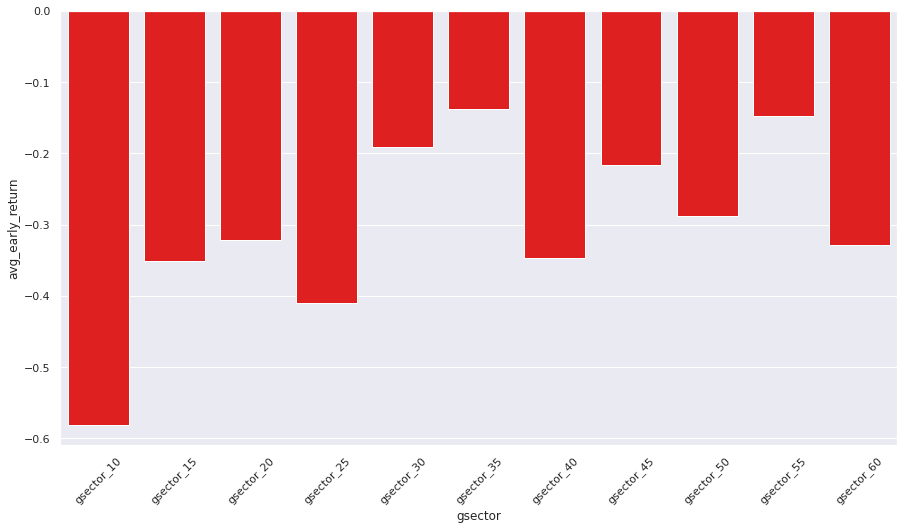

In [52]:
sns.set(rc = {'figure.figsize':(15,8)})
chart1 = sns.barplot(x='gsector',y='avg_early_return',data=avg_return_gsector,color='red')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

[Text(0, 0, 'gsector_10'),
 Text(0, 0, 'gsector_15'),
 Text(0, 0, 'gsector_20'),
 Text(0, 0, 'gsector_25'),
 Text(0, 0, 'gsector_30'),
 Text(0, 0, 'gsector_35'),
 Text(0, 0, 'gsector_40'),
 Text(0, 0, 'gsector_45'),
 Text(0, 0, 'gsector_50'),
 Text(0, 0, 'gsector_55'),
 Text(0, 0, 'gsector_60')]

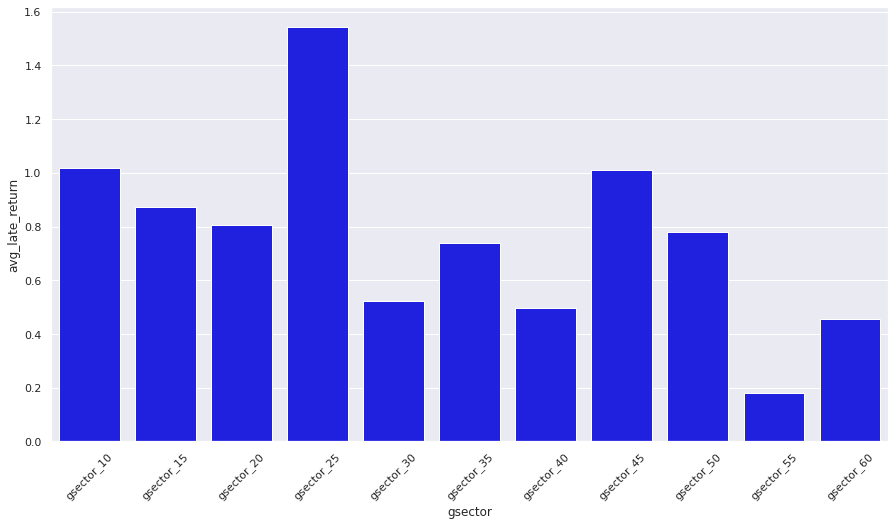

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
chart1 = sns.barplot(x='gsector',y='avg_late_return',data=avg_return_gsector,color='blue')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

In [20]:
return_high = avg_return2[avg_return2.avg_early_return == avg_return2.avg_early_return.max()]
return_high.drop(columns='avg_late_return',inplace=True)
return_high

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gsector,avg_early_return
5,gsector_35,-0.138597


Gsector_35 is healthcare sector. During the early 2020, pandemic was swiping the globe. Health care industry is the hope of all people for making vaccine for prevention and medicine to help people who were infected by virus and even prevention medicine that help people protect themselves of being infected. Also, the requirement of health care equipment is large and urgent. So the performance of stock return of health care is the best among all other industries.

### The lowest stock return for early 2020

In [21]:
return_low = avg_return2[avg_return2.avg_early_return == avg_return2.avg_early_return.min()]
return_low.drop(columns='avg_late_return',inplace=True)
return_low

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gsector,avg_early_return
0,gsector_10,-0.580745


The sector that has the lowest stock return in early2020 is gsector_10 which is energy industry. The average stock return is -0.580745. The impact of COVID-19 on oil gas, and comsumable industry is huge. Oil prices are dropping due to failed agreements on production cuts and the need for chemicals and refined products is slowing from industrial slow-downs and travel restrictions during the global pandemic. Also there was a oil price war between Russia and Saudi Arabia, which have a severe impact on stock market of the United States. So this lowest stock return during early 2020 in oil, gas and consumable fules industry is reasonable.

### The highest stock return for late 2020

In [23]:
return_high = avg_return2[avg_return2.avg_late_return == avg_return2.avg_late_return.max()]
return_high.drop(columns='avg_early_return',inplace=True)
return_high

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gsector,avg_late_return
3,gsector_25,1.541481


The consumer discretionary has the highest stock return in late 2020. The consumer dicretionary includes automobiles & components, consumer durables & apparel, consumer services and retailing. The reason could be as follows:

1. During the late 2020, we still have covid-19 related restrictions. We are required to wear masks and keep social distancing all the time, so traveling would be a trouble especially on public trasportation. With that being said, the needs for automobiles increased drastically. Similarly, the needs for automobile related components increased since these two are complementary goods.

2. Because of the stay-home requirement, we spent more time staying at home, which may increase the need of household durables and some leisure products. No entertainment outside, we saved more money and spent on luxury goods.


### The lowest stock return for late 2020

In [25]:
return_low = avg_return2[avg_return2.avg_late_return == avg_return2.avg_late_return.min()]
return_low.drop(columns='avg_early_return',inplace=True)
return_low

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gsector,avg_late_return
9,gsector_55,0.181212


The sector that has the lowest stock return in late 2020 is gsector_55 which represents the utilities. The average stock return is 0.181212. Because electricity, gas and water are the daily requirements of people, so the reviving of the economy would not have huge infuluence on the 5510 group industry's stock return. 

### Run fixed effect regressions (using industry fixed effects) to explain both ReturnEarly2020

### Early2020

In [24]:
# define x as a subset of original dataframe
x = df_gsector.loc[:,df_gsector.columns.str.contains('gsector')]
# define y as a series of ReturnEarly2020
y = df_gsector['ReturnEarly2020']

# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ReturnEarly2020   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     35.82
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           2.85e-66
Time:                        23:59:19   Log-Likelihood:                -518.64
No. Observations:                2666   AIC:                             1059.
Df Residuals:                    2655   BIC:                             1124.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gsector_10    -0.5807      0.029    -20.107      0.000      -0.637      -0.524
gsector_15    -0.3509      0.027    -13.105      0.000      -0.403      -0.298
gsector_20    -0.3218      0.015    -20.956      0.000      -0.352      -0.292
gsector_25    -0.4098      0.017    -24.178      0.000      -0.443      -0.377
gsector_30    -0.1913      0.029     -6.686      0.000      -0.247      -0.135
gsector_35    -0.1386      0.013    -10.309      0.000      -0.165      -0.112
gsector_40    -0.3464      0.013    -26.406      0.000      -0.372      -0.321
gsector_45    -0.2164      0.016    -13.570      0.000      -0.248      -0.185
gsector_50    -0.2883      0.030     -9.540      0.000      -0.348      -0.229
gsector_55    -0.1479      0.035     -4.171      0.000      -0.217      -0.078
gsector_60    -0.3281      0.022    -14.779      0.000      -0.372      -0.285
==============================================================================
Omnibus:                     4239.497   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4703258.835
Skew:                           9.792   Prob(JB):                         0.00
Kurtosis:                     207.833   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the output above we can see that all sectors are statistically significant. Pandemic has a severe impact on all sectors.
The coefficients of each sector indicate the average return in early 2020 of these industries. For example, the coefficient of gsector_10 is -0.5807, which means that average stock return of gsector_10 is -0.5807 in early 2020.

### Late2020

In [98]:
# define x as a subset of original dataframe
x = df_gsector.loc[:,df_gsector.columns.str.contains('gsector')]
# define y as a series of ReturnEarly2020
y = df_gsector['ReturnLate2020']

# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ReturnLate2020   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     27.60
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.00e-50
Time:                        02:12:13   Log-Likelihood:                -3840.8
No. Observations:                2666   AIC:                             7704.
Df Residuals:                    2655   BIC:                             7768.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gsector_10     1.0175      0.100     10.133      0.000       0.821       1.214
gsector_15     0.8732      0.093      9.380      0.000       0.691       1.056
gsector_20     0.8051      0.053     15.082      0.000       0.700       0.910
gsector_25     1.5415      0.059     26.158      0.000       1.426       1.657
gsector_30     0.5243      0.099      5.271      0.000       0.329       0.719
gsector_35     0.7397      0.047     15.826      0.000       0.648       0.831
gsector_40     0.4980      0.046     10.916      0.000       0.409       0.587
gsector_45     1.0092      0.055     18.198      0.000       0.900       1.118
gsector_50     0.7779      0.105      7.404      0.000       0.572       0.984
gsector_55     0.1812      0.123      1.470      0.142      -0.061       0.423
gsector_60     0.4567      0.077      5.916      0.000       0.305       0.608
==============================================================================
Omnibus:                     2888.497   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           340189.052
Skew:                           5.249   Prob(JB):                         0.00
Kurtosis:                      57.335   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the output above we can see that all industry is statistically significant except for gsector_55 which is the utilities sector. It can be interpreted that economic reviving of later pandemic have positive influence on almost all the industries but slightly or no influence on utility sector. Because electricity, gas and water are the daily requirements of people, so the reviving of the economy would not have huge infuluence on the 5510 group industry's stock return. 
The coefficients of each industry indicate the average return in late 2020 of these industries. For example, the coefficient of gsector_10 is 1.0175, which means that average stock return of ggsector_10 is 1.0175 in late 2020.

The adjusted R square of regression on RenturnEarly2020 is 0.116, and the adjusted R square of regression on ReturnLate2020 is 0.091. In this way, the epxlanatory power of regression on ReturnEarly2020 is higher than that on ResturnLate2020.

### Combine the industry fixed effects with financial ratios

In [26]:
df_gsector_ratio = df_gsector.merge(assign3,how='inner',left_on='tic',right_on='TICKER')
df_gsector_ratio.drop(columns=['tic','TICKER'],inplace=True)
df_gsector_ratio.head()

,ReturnEarly2020,ReturnLate2020,gsector_10,gsector_15,gsector_20,gsector_25,gsector_30,gsector_35,gsector_40,gsector_45,gsector_50,gsector_55,gsector_60,Price/Book,P/E,P/EBIT,P/SALES
0,-0.603849,1.039410,0,0,1,0,0,0,0,0,0,0,0,1.753683,359.744250,14.602165,0.757610
1,-0.572734,0.293682,0,0,1,0,0,0,0,0,0,0,0,-31.367242,7.284023,3.313778,0.268329
2,-0.390339,0.490365,0,0,1,0,0,0,0,0,0,0,0,1.394434,15.200171,13.716717,0.787288
3,-0.150483,0.086464,0,0,0,0,0,0,0,0,0,1,0,1.861908,18.783195,15.047576,2.912924
4,-0.087773,0.402724,0,0,0,0,0,1,0,0,0,0,0,4.924441,41.521836,30.369175,4.798490


### Early2020

In [27]:
# define x as a subset of original dataframe
x = df_gsector_ratio.loc[:,~df_gsector_ratio.columns.str.contains('Return')]
# define y as a series
y = df_gsector_ratio['ReturnEarly2020']
# Add a constant
x = sm.add_constant(x)
# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ReturnEarly2020   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     27.42
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           6.03e-68
Time:                        00:21:51   Log-Likelihood:                -492.42
No. Observations:                2599   AIC:                             1015.
Df Residuals:                    2584   BIC:                             1103.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2852      0.007    -40.962      0.000      -0.299      -0.272
gsector_10    -0.3016      0.027    -11.085      0.000      -0.355      -0.248
gsector_15    -0.0724      0.025     -2.881      0.004      -0.122      -0.023
gsector_20    -0.0459      0.015     -2.992      0.003      -0.076      -0.016
gsector_25    -0.1377      0.017     -8.286      0.000      -0.170      -0.105
gsector_30     0.0792      0.026      3.031      0.002       0.028       0.131
gsector_35     0.1461      0.015      9.475      0.000       0.116       0.176
gsector_40    -0.0674      0.014     -4.948      0.000      -0.094      -0.041
gsector_45     0.0508      0.016      3.151      0.002       0.019       0.082
gsector_50    -0.0116      0.028     -0.412      0.680      -0.067       0.044
gsector_55     0.1312      0.032      4.044      0.000       0.068       0.195
gsector_60    -0.0559      0.021     -2.616      0.009      -0.098      -0.014
Price/Book     0.0020      0.001      3.167      0.002       0.001       0.003
P/E            0.0001   7.23e-05      1.570      0.117   -2.83e-05       0.000
P/EBIT      6.401e-05      0.000      0.635      0.526      -0.000       0.000
P/SALES     7.752e-05      0.000      0.714      0.475      -0.000       0.000
==============================================================================
Omnibus:                     4195.976   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4920764.797
Skew:                          10.085   Prob(JB):                         0.00
Kurtosis:                     215.210   Cond. No.                     1.62e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.3e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After combining four industry ratios, the adjusted R square increased slightly, from 0.116 to 0.125. So explanatory power of regression on ReturnEarly2020 only increased 0.09. 

Apart from that, It worth noting that, only price/book ratio is statistically significant, the p-value of which is 0.002. The stock return in early 2020 would increase 0.002 when price/book ratio increase by 1.

### Late2020

In [28]:
# define x as a subset of original dataframe
x = df_gsector_ratio.loc[:,~df_gsector_ratio.columns.str.contains('Return')]
# define y as a series
y = df_gsector_ratio['ReturnLate2020']
# Add a constant
x = sm.add_constant(x)
# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ReturnLate2020   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     22.06
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           4.46e-54
Time:                        00:27:06   Log-Likelihood:                -3727.0
No. Observations:                2599   AIC:                             7484.
Df Residuals:                    2584   BIC:                             7572.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7153      0.024     29.597      0.000       0.668       0.763
gsector_10     0.3069      0.094      3.249      0.001       0.122       0.492
gsector_15     0.1755      0.087      2.013      0.044       0.005       0.346
gsector_20     0.1146      0.053      2.151      0.032       0.010       0.219
gsector_25     0.8465      0.058     14.674      0.000       0.733       0.960
gsector_30    -0.1825      0.091     -2.011      0.044      -0.360      -0.005
gsector_35     0.0282      0.054      0.527      0.599      -0.077       0.133
gsector_40    -0.1990      0.047     -4.207      0.000      -0.292      -0.106
gsector_45     0.3009      0.056      5.375      0.000       0.191       0.411
gsector_50     0.0266      0.098      0.271      0.786      -0.166       0.219
gsector_55    -0.4983      0.113     -4.425      0.000      -0.719      -0.277
gsector_60    -0.2041      0.074     -2.754      0.006      -0.349      -0.059
Price/Book     0.0006      0.002      0.262      0.793      -0.004       0.005
P/E           -0.0007      0.000     -2.709      0.007      -0.001      -0.000
P/EBIT        -0.0013      0.000     -3.654      0.000      -0.002      -0.001
P/SALES        0.0007      0.000      1.977      0.048    5.94e-06       0.001
==============================================================================
Omnibus:                     2858.326   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           356865.732
Skew:                           5.365   Prob(JB):                         0.00
Kurtosis:                      59.394   Cond. No.                     1.62e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.3e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After combining four industry ratios, the adjusted R square increased from 0.091 to 0.102. So the explanatory power of regression on ReturnLate2020 increased slightly. 

Apart from that, p-value of price/book is 0.793, which is not statistically significant.

The p-value of P/E ratio is 0.007, which is statistically significant, if stock return in late 2020 decreased by 0.0007, P/E ratio would incread by 1. 

P-value of P/EBIT is 0.000, which is statistically significant, if stock return in late 2020 decreased by 0.0013, P/EBIT ratio would incread by 1. 

P-value of P/SALES is 0.048, which is statistically significant, if stock return in late 2020 increased by 0.0007, P/SALES ratio would incread by 1. 

# **SIC Analysis**

### Create Industry Indicator (category) variables for the 24 Industry categories based on SIC

In [55]:
df_sic = df[['tic','sic','ReturnEarly2020','ReturnLate2020']]
df_sic.head()

,tic,sic,ReturnEarly2020,ReturnLate2020
0,AIR,5080,-0.603849,1.039410
1,AAL,4512,-0.572734,0.293682
2,CECE,3564,-0.390339,0.490365
3,PNW,4911,-0.150483,0.086464
4,ABT,3845,-0.087773,0.402724


### We need to categorize the sic groups into main groups

In [56]:
def sic_cate(sic):
  if sic >= 100 and sic <= 999:
    return '0100-0999'
  elif sic >= 1000 and sic <=1499:
    return '1000-1499'
  elif sic >= 1500 and sic <= 1799:
    return '1500-1799'
  elif sic >= 1800 and sic <= 1999:
    return '1800-1999'
  elif sic >= 2000 and sic <= 3999:
    return '2000-3999'
  elif sic >= 4000 and sic <= 4999:
    return '4000-4999'
  elif sic >= 5000 and sic <= 5199:
    return '5000-5199'
  elif sic >= 5200 and sic <= 5999:
    return '5200-5999'
  elif sic >= 6000 and sic <= 6799:
    return '6000-6799'
  elif sic >= 7000 and sic <= 8999:
    return '7000-8999'
  elif sic >= 9100 and sic <= 9729:
    return '9100-9729'
  elif sic >= 9900 and sic <= 9999:
    return '9900-9999'

In [57]:
df_sic['sic_category'] = df['sic'].apply(sic_cate)
df_sic.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tic,sic,ReturnEarly2020,ReturnLate2020,sic_category
0,AIR,5080,-0.603849,1.039410,5000-5199
1,AAL,4512,-0.572734,0.293682,4000-4999
2,CECE,3564,-0.390339,0.490365,2000-3999
3,PNW,4911,-0.150483,0.086464,4000-4999
4,ABT,3845,-0.087773,0.402724,2000-3999


In [58]:
df_sic.drop(columns='sic',inplace=True)
# Get dummies of sic
df_sic = pd.get_dummies(df_sic, columns=['sic_category'])
df_sic.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tic,ReturnEarly2020,ReturnLate2020,sic_category_0100-0999,sic_category_1000-1499,sic_category_1500-1799,sic_category_2000-3999,sic_category_4000-4999,sic_category_5000-5199,sic_category_5200-5999,sic_category_6000-6799,sic_category_7000-8999,sic_category_9900-9999
0,AIR,-0.603849,1.039410,0,0,0,0,0,1,0,0,0,0
1,AAL,-0.572734,0.293682,0,0,0,0,1,0,0,0,0,0
2,CECE,-0.390339,0.490365,0,0,0,1,0,0,0,0,0,0
3,PNW,-0.150483,0.086464,0,0,0,0,1,0,0,0,0,0
4,ABT,-0.087773,0.402724,0,0,0,1,0,0,0,0,0,0


In [59]:
# Create a list of  
sic = (df_sic.loc[:,df_sic.columns.str.contains('sic')]).columns.to_list()

# Calculate average stock return of each group
avg_late_return3 = []
avg_early_return3 = []
a = [0]*len(sic)
for i in range(len(a)):
  a[i] = df_sic[df_sic[sic[i]] == 1]
  avg_late = sum(a[i]['ReturnLate2020'])/a[i].shape[0]
  avg_early = sum(a[i]['ReturnEarly2020'])/a[i].shape[0]
  avg_late_return3.append(avg_late)
  avg_early_return3.append(avg_early)

In [61]:
# Put all results into dataframe
avg_return_sic = pd.DataFrame(
    {'sic': sic,
     'avg_late_return': avg_late_return3,
     'avg_early_return': avg_early_return3
    })
avg_return_sic

,sic,avg_late_return,avg_early_return
0,sic_category_0100-0999,0.157886,-0.184881
1,sic_category_1000-1499,1.243543,-0.604631
2,sic_category_1500-1799,1.117741,-0.363957
3,sic_category_2000-3999,0.889861,-0.245908
4,sic_category_4000-4999,0.458229,-0.249150
5,sic_category_5000-5199,0.755734,-0.320072
6,sic_category_5200-5999,1.525524,-0.384014
7,sic_category_6000-6799,0.487499,-0.342094
8,sic_category_7000-8999,0.964493,-0.241631
9,sic_category_9900-9999,0.353783,-0.288459


We can see that all of the stock returns among 10 sic groupa in early 2020 are negative values. This is because that people didn't realize what would be going on and how terrible the covid-19 is, such as stay-at-home orders and
quarantine requirements. So all the groups have suffered a lot, and the stock return dropped sharply, average value of return in the different groups are negative.

Also it worth noting that all of the average stock returns are positive values. This is because global economy was reviving during the late 2020.

### The highest stock return for early 2020

[Text(0, 0, 'sic_category_0100-0999'),
 Text(0, 0, 'sic_category_1000-1499'),
 Text(0, 0, 'sic_category_1500-1799'),
 Text(0, 0, 'sic_category_2000-3999'),
 Text(0, 0, 'sic_category_4000-4999'),
 Text(0, 0, 'sic_category_5000-5199'),
 Text(0, 0, 'sic_category_5200-5999'),
 Text(0, 0, 'sic_category_6000-6799'),
 Text(0, 0, 'sic_category_7000-8999'),
 Text(0, 0, 'sic_category_9900-9999')]

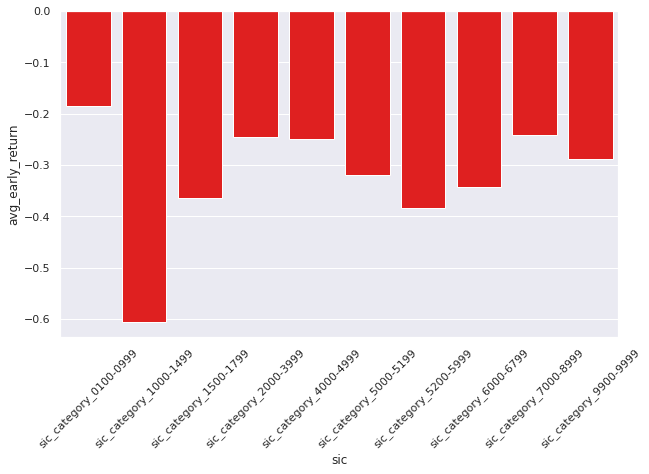

In [62]:
sns.set(rc = {'figure.figsize':(10,6)})
chart1 = sns.barplot(x='sic',y='avg_early_return',data=avg_return_sic,color='red')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

[Text(0, 0, 'sic_category_0100-0999'),
 Text(0, 0, 'sic_category_1000-1499'),
 Text(0, 0, 'sic_category_1500-1799'),
 Text(0, 0, 'sic_category_2000-3999'),
 Text(0, 0, 'sic_category_4000-4999'),
 Text(0, 0, 'sic_category_5000-5199'),
 Text(0, 0, 'sic_category_5200-5999'),
 Text(0, 0, 'sic_category_6000-6799'),
 Text(0, 0, 'sic_category_7000-8999'),
 Text(0, 0, 'sic_category_9900-9999')]

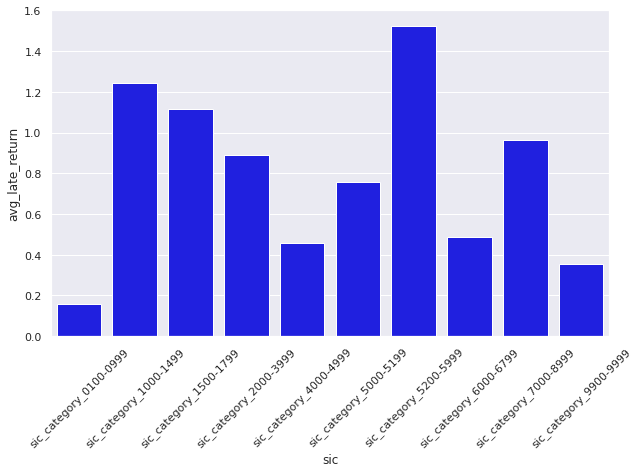

In [63]:
sns.set(rc = {'figure.figsize':(10,6)})
chart1 = sns.barplot(x='sic',y='avg_late_return',data=avg_return_sic,color='blue')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

In [ ]:
sns.set(rc = {'figure.figsize':(10,6)})
chart1 = sns.barplot(x='sic',y='avg_early_return',data=avg_return_sic,color='red')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

In [12]:
return_high = avg_return3[avg_return3.avg_early_return == avg_return3.avg_early_return.max()]
return_high.drop(columns='avg_late_return',inplace=True)
return_high

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sic,avg_early_return
0,sic_category_0100-0999,-0.184881


The industry that has the highest stock return in early 2020 is sic01-09, which is agriculture, forestry and fishing. The average stock return is -0.184881. In sharp contrast to many other industries, livestocks forestry and crops has been generally exempted from major COVID-19-related restrictions. These types of work do not require many people gathering, so the business runs smothly relativily compared to other industries which require a bunch of people working together.

### The lowest stock return for early 2020

In [14]:
return_low = avg_return3[avg_return3.avg_early_return == avg_return3.avg_early_return.min()]
return_low.drop(columns='avg_late_return',inplace=True)
return_low

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sic,avg_early_return
1,sic_category_1000-1499,-0.604631


The industry that has the lowest stock return in early2020 is sic10-14 which is mining industry. The average stock return is -0.604631. The impact of COVID-19 on mining is huge. Oil prices are dropping due to failed agreements on production cuts and the need for chemicals and refined products is slowing from industrial slow-downs and travel restrictions during the global pandemic. Also there was a oil price war between Russia and Saudi Arabia, which have a severe impact on stock market of the United States. So this lowest stock return during early 2020 in oil, gas and consumable fules industry is reasonable.

### The highest stock return for late 2020

In [15]:
return_high = avg_return3[avg_return3.avg_late_return == avg_return3.avg_late_return.max()]
return_high.drop(columns='avg_early_return',inplace=True)
return_high

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sic,avg_late_return
6,sic_category_5200-5999,1.525524


The retail trade has the highest stock return in late 2020. The retail trade includes Building Materials, Hardware, Garden Supply, and Mobile Home Dealers, general mechandise stores, food stores, automotive dealers, apparel and accesory store, Home Furniture, Furnishings, and Equipment Stores, eating and driking places and miscellaneous retail. The reason could be as follows: Because of the stay-home requirement, we spent more time staying at home, which may increase the need of household durables and some other related products.

### The lowest stock return for late 2020

In [16]:
return_low = avg_return3[avg_return3.avg_late_return == avg_return3.avg_late_return.min()]
return_low.drop(columns='avg_early_return',inplace=True)
return_low

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sic,avg_late_return
0,sic_category_0100-0999,0.157886


The industry that has the lowest stock return in late 2020 is sic01-09, which is agriculture, forestry and fishing. The average stock return is 0.157886. As restaurants and schools still closed in late 2020, overall demand for agriculture product showed a decline in the U.S. 

### Run fixed effect regressions (using industry fixed effects) to explain both ReturnEarly2020

### Early2020

In [17]:
# define x as a subset of original dataframe
x = df_sic.loc[:,df_sic.columns.str.contains('sic')]
# define y as a series of ReturnEarly2020
y = df['ReturnEarly2020']
# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ReturnEarly2020   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     16.91
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           2.06e-27
Time:                        05:06:14   Log-Likelihood:                -613.07
No. Observations:                2666   AIC:                             1246.
Df Residuals:                    2656   BIC:                             1305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
sic_category_0100-0999    -0.1849      0.115     -1.603      0.109      -0.411       0.041
sic_category_1000-1499    -0.6046      0.035    -17.162      0.000      -0.674      -0.536
sic_category_1500-1799    -0.3640      0.051     -7.157      0.000      -0.464      -0.264
sic_category_2000-3999    -0.2459      0.009    -25.917      0.000      -0.265      -0.227
sic_category_4000-4999    -0.2491      0.022    -11.577      0.000      -0.291      -0.207
sic_category_5000-5199    -0.3201      0.038     -8.392      0.000      -0.395      -0.245
sic_category_5200-5999    -0.3840      0.026    -14.786      0.000      -0.435      -0.333
sic_category_6000-6799    -0.3421      0.012    -29.474      0.000      -0.365      -0.319
sic_category_7000-8999    -0.2416      0.015    -16.172      0.000      -0.271      -0.212
sic_category_9900-9999    -0.2885      0.176     -1.638      0.102      -0.634       0.057
==============================================================================
Omnibus:                     4106.204   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3959078.759
Skew:                           9.201   Prob(JB):                         0.00
Kurtosis:                     190.888   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the output above we can see that all industry are statistically significant except for sic_category_0100-0999 and sic_category_9900-9999, which is the agriculture, forestry and fishing and public administration. It can be interpreted that pademic have severe negative influence on almost all the industries but slightly or no influence on agriculture, forestry and fishing and public administration.
The coefficients of each industry indicate the average return in early 2020 of these industries. For example, the coefficient of sic_category_1000-1499 is -0.6046, which means that average stock return of sic_category_1000-1499 is -0.6046 in early 2020.

### Late2020

In [148]:
# define x as a subset of original dataframe
x = df_sic.loc[:,df_sic.columns.str.contains('sic')]
# define y as a series of ReturnLate2020
y = df['ReturnLate2020']

# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ReturnLate2020   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     21.11
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           8.49e-35
Time:                        03:49:17   Log-Likelihood:                -3880.5
No. Observations:                2666   AIC:                             7781.
Df Residuals:                    2656   BIC:                             7840.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
sic_category_0100-0999     0.1579      0.393      0.402      0.688      -0.612       0.928
sic_category_1000-1499     1.2435      0.120     10.363      0.000       1.008       1.479
sic_category_1500-1799     1.1177      0.173      6.453      0.000       0.778       1.457
sic_category_2000-3999     0.8899      0.032     27.533      0.000       0.826       0.953
sic_category_4000-4999     0.4582      0.073      6.251      0.000       0.314       0.602
sic_category_5000-5199     0.7557      0.130      5.817      0.000       0.501       1.010
sic_category_5200-5999     1.5255      0.088     17.244      0.000       1.352       1.699
sic_category_6000-6799     0.4875      0.040     12.331      0.000       0.410       0.565
sic_category_7000-8999     0.9645      0.051     18.951      0.000       0.865       1.064
sic_category_9900-9999     0.3538      0.600      0.590      0.555      -0.823       1.530
==============================================================================
Omnibus:                     2908.523   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           362904.329
Skew:                           5.290   Prob(JB):                         0.00
Kurtosis:                      59.169   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the output above we can see that all industry is statistically significant except for sic_category_0100-0999 and sic_category_9900-9999, which are the agriculture, forestry and fishing and public administration. It can be interpreted that economic reviving of later pandemic have positive influence on almost all the industries but slightly or no influence on agriculture, forestry and fishing and public administration. 
The coefficients of each industry indicate the average return in late 2020 of these industries. For example, the coefficient of sic_category_1000-1499 is 1.2435, which means that average stock return of sic_category_1000-1499 is 1.2435 in late 2020.

### Combine the industry fixed effects with other explanatory variables

In [23]:
df_sic_ratio = df_sic.merge(assign3,how='inner',left_on='tic',right_on='TICKER')
df_sic_ratio.drop(columns=['tic','TICKER'],inplace=True)
df_sic_ratio.head()

,ReturnEarly2020,ReturnLate2020,sic_category_0100-0999,sic_category_1000-1499,sic_category_1500-1799,sic_category_2000-3999,sic_category_4000-4999,sic_category_5000-5199,sic_category_5200-5999,sic_category_6000-6799,sic_category_7000-8999,sic_category_9900-9999,Price/Book,P/E,P/EBIT,P/SALES
0,-0.603849,1.039410,0,0,0,0,0,1,0,0,0,0,1.753683,359.744250,14.602165,0.757610
1,-0.572734,0.293682,0,0,0,0,1,0,0,0,0,0,-31.367242,7.284023,3.313778,0.268329
2,-0.390339,0.490365,0,0,0,1,0,0,0,0,0,0,1.394434,15.200171,13.716717,0.787288
3,-0.150483,0.086464,0,0,0,0,1,0,0,0,0,0,1.861908,18.783195,15.047576,2.912924
4,-0.087773,0.402724,0,0,0,1,0,0,0,0,0,0,4.924441,41.521836,30.369175,4.798490


### Early2020

In [24]:
# define x as a subset of original dataframe
x = df_sic_ratio.loc[:,~df_sic_ratio.columns.str.contains('Return')]
# define y as a series
y = df_sic_ratio['ReturnEarly2020']
# Add a constant
x = sm.add_constant(x)
# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ReturnEarly2020   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     14.11
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           5.25e-31
Time:                        05:26:26   Log-Likelihood:                -583.33
No. Observations:                2599   AIC:                             1195.
Df Residuals:                    2585   BIC:                             1277.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3040      0.021    -14.789      0.000      -0.344      -0.264
sic_category_0100-0999     0.1124      0.106      1.062      0.288      -0.095       0.320
sic_category_1000-1499    -0.3149      0.038     -8.260      0.000      -0.390      -0.240
sic_category_1500-1799    -0.0633      0.049     -1.290      0.197      -0.159       0.033
sic_category_2000-3999     0.0354      0.022      1.581      0.114      -0.009       0.079
sic_category_4000-4999     0.0447      0.028      1.592      0.112      -0.010       0.100
sic_category_5000-5199    -0.0203      0.040     -0.514      0.607      -0.098       0.057
sic_category_5200-5999    -0.0924      0.031     -2.998      0.003      -0.153      -0.032
sic_category_6000-6799    -0.0477      0.023     -2.077      0.038      -0.093      -0.003
sic_category_7000-8999     0.0379      0.025      1.533      0.125      -0.011       0.086
sic_category_9900-9999     0.0042      0.160      0.026      0.979      -0.309       0.318
Price/Book                 0.0027      0.001      4.105      0.000       0.001       0.004
P/E                        0.0001   7.48e-05      1.612      0.107   -2.61e-05       0.000
P/EBIT                 -1.179e-05      0.000     -0.113      0.910      -0.000       0.000
P/SALES                    0.0003      0.000      2.628      0.009    7.38e-05       0.001
==============================================================================
Omnibus:                     4075.102   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4184435.107
Skew:                           9.524   Prob(JB):                         0.00
Kurtosis:                     198.647   Cond. No.                     1.33e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After combining four industry ratios, the adjusted R square increased slightly, from 0.051 to 0.062. So explanatory power of regression on ReturnEarly2020 only increased 0.11. 

Apart from that, It worth noting that, only P/E and P/EBIT ratios are statistically insignificant, the p-value of which is 0.107 and 0.91. 

The P-value of Price/Book and P/Sales are 0.000 and 0.009 respectively. The stock return in early 2020 would increase 0.0027 when price/book ratio increase by 1, and the stock return in early 2020 would increase 0.0003 when price/book ratio increase by 1

### Late2020

In [25]:
# define x as a subset of original dataframe
x = df_sic_ratio.loc[:,~df_sic_ratio.columns.str.contains('Return')]
# define y as a series
y = df_sic_ratio['ReturnLate2020']
# Add a constant
x = sm.add_constant(x)
# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ReturnLate2020   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     16.84
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           8.94e-38
Time:                        05:28:13   Log-Likelihood:                -3768.1
No. Observations:                2599   AIC:                             7564.
Df Residuals:                    2585   BIC:                             7646.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7411      0.070     10.586      0.000       0.604       0.878
sic_category_0100-0999    -0.5661      0.360     -1.571      0.116      -1.273       0.141
sic_category_1000-1499     0.5130      0.130      3.952      0.000       0.258       0.767
sic_category_1500-1799     0.3911      0.167      2.342      0.019       0.064       0.719
sic_category_2000-3999     0.1735      0.076      2.277      0.023       0.024       0.323
sic_category_4000-4999    -0.2663      0.096     -2.785      0.005      -0.454      -0.079
sic_category_5000-5199     0.0381      0.135      0.283      0.777      -0.226       0.302
sic_category_5200-5999     0.8043      0.105      7.664      0.000       0.599       1.010
sic_category_6000-6799    -0.2250      0.078     -2.876      0.004      -0.378      -0.072
sic_category_7000-8999     0.2347      0.084      2.787      0.005       0.070       0.400
sic_category_9900-9999    -0.3561      0.545     -0.654      0.513      -1.424       0.712
Price/Book                 0.0002      0.002      0.073      0.942      -0.004       0.005
P/E                       -0.0007      0.000     -2.634      0.008      -0.001      -0.000
P/EBIT                    -0.0011      0.000     -3.201      0.001      -0.002      -0.000
P/SALES                    0.0005      0.000      1.441      0.150      -0.000       0.001
==============================================================================
Omnibus:                     2880.247   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380172.970
Skew:                           5.416   Prob(JB):                         0.00
Kurtosis:                      61.252   Cond. No.                     1.33e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After combining four industry ratios, the adjusted R square increased from 0.064 to 0.073. So the explanatory power of regression on ReturnLate2020 increased slightly. 

Apart from that, p-value of price/book and P/Sales are 0.092 and 0.150 respectively , which is not statistically significant.

The p-value of P/E ratio is 0.008, which is statistically significant, if stock return in late 2020 decreased by 0.0007, P/E ratio would incread by 1. 

P-value of P/EBIT is 0.001, which is statistically significant, if stock return in late 2020 decreased by 0.0011, P/EBIT ratio would incread by 1.  

# **NAICS Analysis**

In [64]:
df_naics = df[['tic','naics','ReturnEarly2020','ReturnLate2020']]
df_naics.head()

,tic,naics,ReturnEarly2020,ReturnLate2020
0,AIR,423860,-0.603849,1.039410
1,AAL,481111,-0.572734,0.293682
2,CECE,333413,-0.390339,0.490365
3,PNW,2211,-0.150483,0.086464
4,ABT,334510,-0.087773,0.402724


In [65]:
# The naics is integer type, we need to convert it into string, which could help us to categorize industries.
df_naics["naics"] = df_naics["naics"].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
# Create the column that only contain the category code
cate = []
for i in df_naics['naics']:
  cate.append(i[0:2])
df_naics['naics_cate'] = cate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [67]:
df_naics.head()

,tic,naics,ReturnEarly2020,ReturnLate2020,naics_cate
0,AIR,423860,-0.603849,1.039410,42
1,AAL,481111,-0.572734,0.293682,48
2,CECE,333413,-0.390339,0.490365,33
3,PNW,2211,-0.150483,0.086464,22
4,ABT,334510,-0.087773,0.402724,33


In [68]:
# some industry contains several codes together, so we need to figure out
df_naics.loc[df_naics.naics_cate=='31','naics_cate'] = '31-33'
df_naics.loc[df_naics.naics_cate=='32','naics_cate'] = '31-33'
df_naics.loc[df_naics.naics_cate=='33','naics_cate'] = '31-33'
df_naics.loc[df_naics.naics_cate=='44','naics_cate'] = '44-45'
df_naics.loc[df_naics.naics_cate=='45','naics_cate'] = '44-45'
df_naics.loc[df_naics.naics_cate=='48','naics_cate'] = '48-49'
df_naics.loc[df_naics.naics_cate=='49','naics_cate'] = '48-49'
df_naics.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,tic,naics,ReturnEarly2020,ReturnLate2020,naics_cate
0,AIR,423860,-0.603849,1.039410,42
1,AAL,481111,-0.572734,0.293682,48-49
2,CECE,333413,-0.390339,0.490365,31-33
3,PNW,2211,-0.150483,0.086464,22
4,ABT,334510,-0.087773,0.402724,31-33


In [69]:
df_naics.drop(columns='naics',inplace=True)
# Get dummies of naics
df_naics = pd.get_dummies(df_naics, columns=['naics_cate'])
df_naics.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tic,ReturnEarly2020,ReturnLate2020,naics_cate_11,naics_cate_21,naics_cate_22,naics_cate_23,naics_cate_31-33,naics_cate_42,naics_cate_44-45,naics_cate_48-49,naics_cate_51,naics_cate_52,naics_cate_53,naics_cate_54,naics_cate_56,naics_cate_61,naics_cate_62,naics_cate_71,naics_cate_72,naics_cate_81,naics_cate_99
0,AIR,-0.603849,1.039410,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AAL,-0.572734,0.293682,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,CECE,-0.390339,0.490365,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,PNW,-0.150483,0.086464,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ABT,-0.087773,0.402724,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
# Create a list of  
naics = (df_naics.loc[:,df_naics.columns.str.contains('naics')]).columns.to_list()

# Calculate average stock return of each group
avg_late_return_4 = []
avg_early_return_4 = []
b = [0]*len(naics)
for i in range(len(b)):
  b[i] = df_naics[df_naics[naics[i]] == 1]
  avg_late = sum(b[i]['ReturnLate2020'])/b[i].shape[0]
  avg_early = sum(b[i]['ReturnEarly2020'])/b[i].shape[0]
  avg_late_return_4.append(avg_late)
  avg_early_return_4.append(avg_early)

In [71]:
# Put all results into dataframe
avg_return_naics = pd.DataFrame(
    {'naics': naics,
     'avg_late_return': avg_late_return_4,
     'avg_early_return': avg_early_return_4
    })
avg_return_naics

,naics,avg_late_return,avg_early_return
0,naics_cate_11,0.123019,-0.158294
1,naics_cate_21,1.231517,-0.597364
2,naics_cate_22,0.191994,-0.155907
3,naics_cate_23,1.090058,-0.371588
4,naics_cate_31-33,0.890767,-0.245144
5,naics_cate_42,0.755734,-0.320072
6,naics_cate_44-45,1.655214,-0.371797
7,naics_cate_48-49,0.600611,-0.346517
8,naics_cate_51,0.982884,-0.191845
9,naics_cate_52,0.494335,-0.346630


### The highest stock return for early 2020

[Text(0, 0, 'naics_cate_11'),
 Text(0, 0, 'naics_cate_21'),
 Text(0, 0, 'naics_cate_22'),
 Text(0, 0, 'naics_cate_23'),
 Text(0, 0, 'naics_cate_31-33'),
 Text(0, 0, 'naics_cate_42'),
 Text(0, 0, 'naics_cate_44-45'),
 Text(0, 0, 'naics_cate_48-49'),
 Text(0, 0, 'naics_cate_51'),
 Text(0, 0, 'naics_cate_52'),
 Text(0, 0, 'naics_cate_53'),
 Text(0, 0, 'naics_cate_54'),
 Text(0, 0, 'naics_cate_56'),
 Text(0, 0, 'naics_cate_61'),
 Text(0, 0, 'naics_cate_62'),
 Text(0, 0, 'naics_cate_71'),
 Text(0, 0, 'naics_cate_72'),
 Text(0, 0, 'naics_cate_81'),
 Text(0, 0, 'naics_cate_99')]

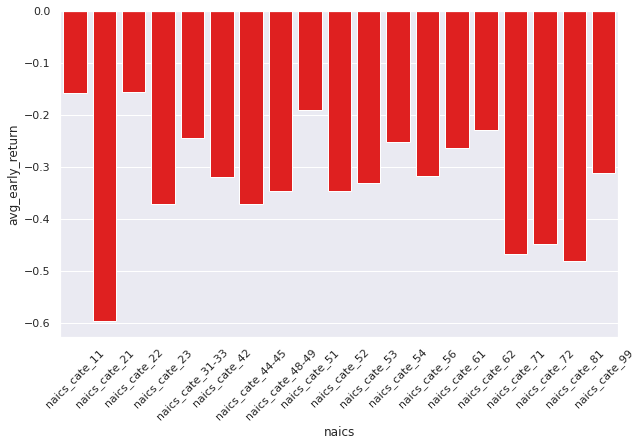

In [72]:
sns.set(rc = {'figure.figsize':(10,6)})
chart1 = sns.barplot(x='naics',y='avg_early_return',data=avg_return_naics,color='red')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

[Text(0, 0, 'naics_cate_11'),
 Text(0, 0, 'naics_cate_21'),
 Text(0, 0, 'naics_cate_22'),
 Text(0, 0, 'naics_cate_23'),
 Text(0, 0, 'naics_cate_31-33'),
 Text(0, 0, 'naics_cate_42'),
 Text(0, 0, 'naics_cate_44-45'),
 Text(0, 0, 'naics_cate_48-49'),
 Text(0, 0, 'naics_cate_51'),
 Text(0, 0, 'naics_cate_52'),
 Text(0, 0, 'naics_cate_53'),
 Text(0, 0, 'naics_cate_54'),
 Text(0, 0, 'naics_cate_56'),
 Text(0, 0, 'naics_cate_61'),
 Text(0, 0, 'naics_cate_62'),
 Text(0, 0, 'naics_cate_71'),
 Text(0, 0, 'naics_cate_72'),
 Text(0, 0, 'naics_cate_81'),
 Text(0, 0, 'naics_cate_99')]

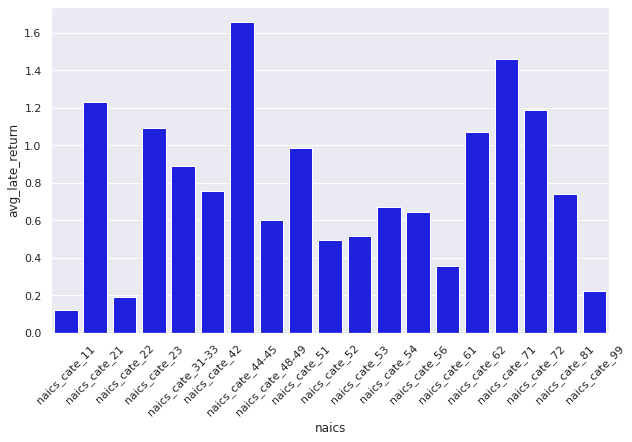

In [73]:
sns.set(rc = {'figure.figsize':(10,6)})
chart1 = sns.barplot(x='naics',y='avg_late_return',data=avg_return_naics,color='blue')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

In [18]:
return_high = avg_return4[avg_return4.avg_early_return == avg_return4.avg_early_return.max()]
return_high.drop(columns='avg_late_return',inplace=True)
return_high

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,naics,avg_early_return
2,naics_cate_22,-0.155907


The industry that has the highest stock return in early 2020 is naics_cate_22	 which represents the electricity, gas and water utilities. The average stock return is -0.155907. Because electricity, gas and water are the daily requirements of people, so the outbreak of covid-19 would not have huge infuluence on the naics_cate_22	's stock return. 

### The lowest stock return for early 2020

In [19]:
return_low = avg_return4[avg_return4.avg_early_return == avg_return4.avg_early_return.min()]
return_low.drop(columns='avg_late_return',inplace=True)
return_low

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,naics,avg_early_return
1,naics_cate_21,-0.597364


The industry that has the lowest stock return in early2020 is naics_cate_21 which is oil, gas & consumable fules industry. The average stock return is -0.597364. The impact of COVID-19 on oil gas, and comsumable industry is huge. Oil prices are dropping due to failed agreements on production cuts and the need for chemicals and refined products is slowing from industrial slow-downs and travel restrictions during the global pandemic. Also there was a oil price war between Russia and Saudi Arabia, which have a severe impact on stock market of the United States. So this lowest stock return during early 2020 in oil, gas and consumable fules industry is reasonable.

### The highest stock return for late 2020

In [20]:
return_high = avg_return4[avg_return4.avg_late_return == avg_return4.avg_late_return.max()]
return_high.drop(columns='avg_early_return',inplace=True)
return_high

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,naics,avg_late_return
6,naics_cate_44-45,1.655214


The highest stock return in late 2020 is 	naics_cate_44-45, which is retail trade category. Because of the stay-home requirement, we spent more time staying at home, which may increase the need of household durables (furnitures, garden suppliers, ect.) and some leisure products(musical instruments, books, etc.). 

### The lowest stock return for late 2020

In [21]:
return_low = avg_return4[avg_return4.avg_late_return == avg_return4.avg_late_return.min()]
return_low.drop(columns='avg_early_return',inplace=True)
return_low

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,naics,avg_late_return
0,naics_cate_11,0.123019


The lowest stock return in late 2020 is naics_cate_11, which is 0.123019. As restaurants and schools still closed in late 2020, overall demand for agriculture product showed a decline in the U.S. 

### Run fixed effect regressions (using industry fixed effects) to explain both ReturnEarly2020

### Early2020

In [22]:
# define x as a subset of original dataframe
x = df_naics.loc[:,df_naics.columns.str.contains('naics')]
# define y as a series of ReturnEarly2020
y = df['ReturnEarly2020']

# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ReturnEarly2020   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     11.27
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           6.10e-32
Time:                        00:15:09   Log-Likelihood:                -588.92
No. Observations:                2666   AIC:                             1216.
Df Residuals:                    2647   BIC:                             1328.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
naics_cate_11       -0.1583      0.124     -1.280      0.201      -0.401       0.084
naics_cate_21       -0.5974      0.035    -17.307      0.000      -0.665      -0.530
naics_cate_22       -0.1559      0.036     -4.307      0.000      -0.227      -0.085
naics_cate_23       -0.3716      0.049     -7.563      0.000      -0.468      -0.275
naics_cate_31-33    -0.2451      0.009    -25.964      0.000      -0.264      -0.227
naics_cate_42       -0.3201      0.038     -8.454      0.000      -0.394      -0.246
naics_cate_44-45    -0.3718      0.030    -12.459      0.000      -0.430      -0.313
naics_cate_48-49    -0.3465      0.037     -9.435      0.000      -0.419      -0.274
naics_cate_51       -0.1918      0.018    -10.389      0.000      -0.228      -0.156
naics_cate_52       -0.3466      0.013    -25.872      0.000      -0.373      -0.320
naics_cate_53       -0.3310      0.022    -15.300      0.000      -0.373      -0.289
naics_cate_54       -0.2525      0.036     -7.025      0.000      -0.323      -0.182
naics_cate_56       -0.3185      0.045     -7.132      0.000      -0.406      -0.231
naics_cate_61       -0.2648      0.087     -3.028      0.002      -0.436      -0.093
naics_cate_62       -0.2294      0.050     -4.608      0.000      -0.327      -0.132
naics_cate_71       -0.4683      0.087     -5.357      0.000      -0.640      -0.297
naics_cate_72       -0.4488      0.044    -10.266      0.000      -0.535      -0.363
naics_cate_81       -0.4808      0.114     -4.200      0.000      -0.705      -0.256
naics_cate_99       -0.3127      0.214     -1.460      0.144      -0.733       0.107
==============================================================================
Omnibus:                     4159.792   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4243787.092
Skew:                           9.435   Prob(JB):                         0.00
Kurtosis:                     197.544   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the output above we can see that all industry are statistically significant except for naics_cate_11 and naics_cate_99, which is the agriculture, forestry, fishing and hunting industry and theunknown category. It can be interpreted that pademic have severe negative influence on almost all the industries but slightly or no influence on agriculture, forestry, fishing and hunting industry.
The coefficients of each industry indicate the average return in early 2020 of these industries. For example, the coefficient of naics_cate_21 is -0.5974, which means that average stock return of naics_cate_21 is -0.5974 in early 2020.

### Late2020

In [23]:
# define x as a subset of original dataframe
x = df_naics.loc[:,df_naics.columns.str.contains('naics')]
# define y as a series of ReturnEarly2020
y = df['ReturnLate2020']

# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ReturnLate2020   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     11.66
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           3.08e-33
Time:                        00:15:12   Log-Likelihood:                -3870.9
No. Observations:                2666   AIC:                             7780.
Df Residuals:                    2647   BIC:                             7892.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
naics_cate_11        0.1230      0.423      0.291      0.771      -0.707       0.953
naics_cate_21        1.2315      0.118     10.418      0.000       1.000       1.463
naics_cate_22        0.1920      0.124      1.549      0.122      -0.051       0.435
naics_cate_23        1.0901      0.168      6.478      0.000       0.760       1.420
naics_cate_31-33     0.8908      0.032     27.547      0.000       0.827       0.954
naics_cate_42        0.7557      0.130      5.829      0.000       0.501       1.010
naics_cate_44-45     1.6552      0.102     16.195      0.000       1.455       1.856
naics_cate_48-49     0.6006      0.126      4.775      0.000       0.354       0.847
naics_cate_51        0.9829      0.063     15.541      0.000       0.859       1.107
naics_cate_52        0.4943      0.046     10.773      0.000       0.404       0.584
naics_cate_53        0.5156      0.074      6.959      0.000       0.370       0.661
naics_cate_54        0.6700      0.123      5.443      0.000       0.429       0.911
naics_cate_56        0.6423      0.153      4.200      0.000       0.342       0.942
naics_cate_61        0.3542      0.299      1.183      0.237      -0.233       0.941
naics_cate_62        1.0721      0.171      6.287      0.000       0.738       1.406
naics_cate_71        1.4569      0.299      4.866      0.000       0.870       2.044
naics_cate_72        1.1854      0.150      7.918      0.000       0.892       1.479
naics_cate_81        0.7422      0.392      1.893      0.058      -0.027       1.511
naics_cate_99        0.2229      0.733      0.304      0.761      -1.215       1.661
==============================================================================
Omnibus:                     2909.157   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           368745.521
Skew:                           5.285   Prob(JB):                         0.00
Kurtosis:                      59.637   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the output above we can see that all industry is statistically significant except for naics_cate_11, naics_cate_22 and naics_cate_61, which are the agriculture, forestry, fishing and hunting industry, utilities and the educational services. It can be interpreted that economic reviving of later pandemic have positive influence on almost all the industries but slightly or no agriculture, forestry, fishing and hunting industry, utilities and the educational services. Because these are the daily requirements of people, so the reviving of the economy would not have huge infuluence on them. 
The coefficients of each industry indicate the average return in late 2020 of these industries. For example, the coefficient of naics_cate_21 is 1.2315, which means that average stock return of naics_cate_21 is 1.2315 in late 2020.

The adjusted R square of regression on RenturnEarly2020 is 0.065, and the adjusted R square of regression on ReturnLate2020 is 0.067.

### Combine the industry fixed effects with other explanatory variables

In [24]:
df_naics_ratio = df_naics.merge(assign3,how='inner',left_on='tic',right_on='TICKER')
df_naics_ratio.drop(columns=['tic','TICKER'],inplace=True)
df_naics_ratio.head()

,ReturnEarly2020,ReturnLate2020,naics_cate_11,naics_cate_21,naics_cate_22,naics_cate_23,naics_cate_31-33,naics_cate_42,naics_cate_44-45,naics_cate_48-49,naics_cate_51,naics_cate_52,naics_cate_53,naics_cate_54,naics_cate_56,naics_cate_61,naics_cate_62,naics_cate_71,naics_cate_72,naics_cate_81,naics_cate_99,Price/Book,P/E,P/EBIT,P/SALES
0,-0.603849,1.039410,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.753683,359.744250,14.602165,0.757610
1,-0.572734,0.293682,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-31.367242,7.284023,3.313778,0.268329
2,-0.390339,0.490365,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.394434,15.200171,13.716717,0.787288
3,-0.150483,0.086464,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.861908,18.783195,15.047576,2.912924
4,-0.087773,0.402724,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.924441,41.521836,30.369175,4.798490


### Early2020

In [25]:
# define x as a subset of original dataframe
x = df_naics_ratio.loc[:,~df_naics_ratio.columns.str.contains('Return')]
# define y as a series
y = df_naics_ratio['ReturnEarly2020']
# Add a constant
x = sm.add_constant(x)
# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ReturnEarly2020   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     10.58
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.53e-35
Time:                        00:15:16   Log-Likelihood:                -560.04
No. Observations:                2599   AIC:                             1166.
Df Residuals:                    2576   BIC:                             1301.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3221      0.016    -19.580      0.000      -0.354      -0.290
naics_cate_11        0.1578      0.118      1.338      0.181      -0.073       0.389
naics_cate_21       -0.2886      0.037     -7.833      0.000      -0.361      -0.216
naics_cate_22        0.1580      0.037      4.220      0.000       0.085       0.231
naics_cate_23       -0.0531      0.048     -1.104      0.270      -0.147       0.041
naics_cate_31-33     0.0554      0.019      2.948      0.003       0.019       0.092
naics_cate_42       -0.0016      0.039     -0.042      0.966      -0.078       0.074
naics_cate_44-45    -0.0609      0.032     -1.885      0.060      -0.124       0.002
naics_cate_48-49    -0.0326      0.038     -0.851      0.395      -0.108       0.043
naics_cate_51        0.1062      0.024      4.423      0.000       0.059       0.153
naics_cate_52       -0.0313      0.021     -1.519      0.129      -0.072       0.009
naics_cate_53       -0.0238      0.026     -0.907      0.365      -0.075       0.028
naics_cate_54        0.0520      0.038      1.380      0.168      -0.022       0.126
naics_cate_56       -0.0365      0.046     -0.797      0.425      -0.126       0.053
naics_cate_61        0.0537      0.084      0.638      0.523      -0.111       0.219
naics_cate_62        0.0759      0.050      1.525      0.127      -0.022       0.174
naics_cate_71       -0.1525      0.084     -1.809      0.071      -0.318       0.013
naics_cate_72       -0.1379      0.044     -3.163      0.002      -0.223      -0.052
naics_cate_81       -0.1658      0.109     -1.516      0.130      -0.380       0.049
naics_cate_99        0.0036      0.203      0.018      0.986      -0.394       0.401
Price/Book           0.0025      0.001      3.909      0.000       0.001       0.004
P/E                  0.0001   7.46e-05      1.554      0.120   -3.04e-05       0.000
P/EBIT           -1.477e-05      0.000     -0.143      0.887      -0.000       0.000
P/SALES              0.0003      0.000      2.479      0.013    5.69e-05       0.000
==============================================================================
Omnibus:                     4128.475   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4486733.749
Skew:                           9.770   Prob(JB):                         0.00
Kurtosis:                     205.608   Cond. No.                     3.31e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After combining four industry ratios, the adjusted R square increased slightly, from 0.065 to 0.075. So explanatory power of regression on ReturnEarly2020 only increased 0.01. 

Apart from that, It worth noting that, only price/book and P/Sales ratios are statistically significant, the p-value of which are 0.000 and 0.013 respectively. 

The stock return in early 2020 would increase 0.0025 when price/book ratio increase by 1.

The stock return in early 2020 would increase 0.0003 when P/Sales ratio increase by 1.

### Late2020

In [26]:
# define x as a subset of original dataframe
x = df_naics_ratio.loc[:,~df_naics_ratio.columns.str.contains('Return')]
# define y as a series
y = df_naics_ratio['ReturnLate2020']# Add a constant
x = sm.add_constant(x)
# pass x as a dataframe, while pass y as a series
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ReturnLate2020   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     10.76
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.78e-36
Time:                        00:15:19   Log-Likelihood:                -3759.6
No. Observations:                2599   AIC:                             7565.
Df Residuals:                    2576   BIC:                             7700.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7603      0.056     13.494      0.000       0.650       0.871
naics_cate_11       -0.6241      0.404     -1.546      0.122      -1.416       0.168
naics_cate_21        0.4810      0.126      3.811      0.000       0.234       0.729
naics_cate_22       -0.5333      0.128     -4.159      0.000      -0.785      -0.282
naics_cate_23        0.3387      0.165      2.057      0.040       0.016       0.662
naics_cate_31-33     0.1539      0.064      2.389      0.017       0.028       0.280
naics_cate_42        0.0171      0.133      0.128      0.898      -0.243       0.278
naics_cate_44-45     0.9156      0.111      8.274      0.000       0.699       1.133
naics_cate_48-49    -0.1582      0.131     -1.205      0.228      -0.416       0.099
naics_cate_51        0.2185      0.082      2.656      0.008       0.057       0.380
naics_cate_52       -0.2479      0.071     -3.507      0.000      -0.386      -0.109
naics_cate_53       -0.1922      0.090     -2.138      0.033      -0.369      -0.016
naics_cate_54       -0.0691      0.129     -0.535      0.593      -0.322       0.184
naics_cate_56       -0.0768      0.157     -0.489      0.625      -0.385       0.231
naics_cate_61       -0.4087      0.288     -1.418      0.156      -0.974       0.157
naics_cate_62        0.3365      0.170      1.974      0.049       0.002       0.671
naics_cate_71        0.6438      0.289      2.231      0.026       0.078       1.210
naics_cate_72        0.4400      0.149      2.946      0.003       0.147       0.733
naics_cate_81        0.0346      0.375      0.092      0.926      -0.700       0.769
naics_cate_99       -0.5090      0.695     -0.732      0.464      -1.872       0.854
Price/Book           0.0007      0.002      0.301      0.764      -0.004       0.005
P/E                 -0.0007      0.000     -2.706      0.007      -0.001      -0.000
P/EBIT              -0.0011      0.000     -2.996      0.003      -0.002      -0.000
P/SALES              0.0005      0.000      1.244      0.214      -0.000       0.001
==============================================================================
Omnibus:                     2881.671   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           386845.745
Skew:                           5.413   Prob(JB):                         0.00
Kurtosis:                      61.780   Cond. No.                     3.31e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After combining four industry ratios, the adjusted R square increased from 0.067 to 0.084. So the explanatory power of regression on ReturnLate2020 increased slightly. 

Apart from that, p-value of price/book is 0.764, which is not statistically significant.

The p-value of P/E ratio is 0.007, which is statistically significant, if stock return in late 2020 decreased by 0.0007, P/E ratio would incread by 1. 

P-value of P/EBIT is 0.003, which is statistically significant, if stock return in late 2020 decreased by 0.0011, P/EBIT ratio would incread by 1. 

P-value of P/SALES is 0.214, which is statistically significant, if stock return in late 2020 increased by 0.0005, P/SALES ratio would incread by 1. 